In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [28]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
num_obs = len(heart)
print(f'There is {num_obs} observations in the data set.')

There is 918 observations in the data set.


In [30]:
variables = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG', 'MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
label = 'HeartDisease'

X, y = heart[variables].values, heart[label].values

# show first 5 patients and a list of their featurs
for ii in range(0,5):
    print('\nPatient', str(ii+1), '\nFeatures:', list(X[ii]), '\nLabel:', y[ii])


Patient 1 
Features: [40, 'M', 'ATA', 140, 289, 0, 'Normal', 172, 'N', 0.0, 'Up'] 
Label: 0

Patient 2 
Features: [49, 'F', 'NAP', 160, 180, 0, 'Normal', 156, 'N', 1.0, 'Flat'] 
Label: 1

Patient 3 
Features: [37, 'M', 'ATA', 130, 283, 0, 'ST', 98, 'N', 0.0, 'Up'] 
Label: 0

Patient 4 
Features: [48, 'F', 'ASY', 138, 214, 0, 'Normal', 108, 'Y', 1.5, 'Flat'] 
Label: 1

Patient 5 
Features: [54, 'M', 'NAP', 150, 195, 0, 'Normal', 122, 'N', 0.0, 'Up'] 
Label: 0


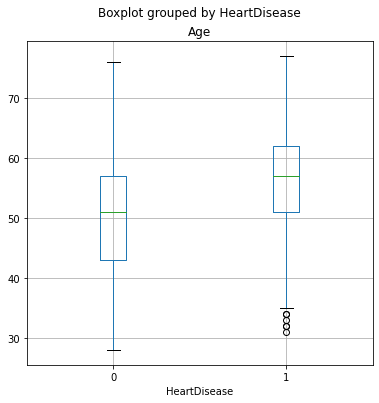

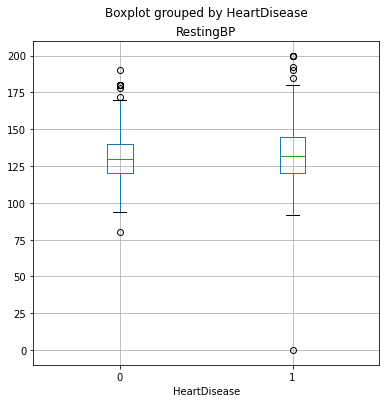

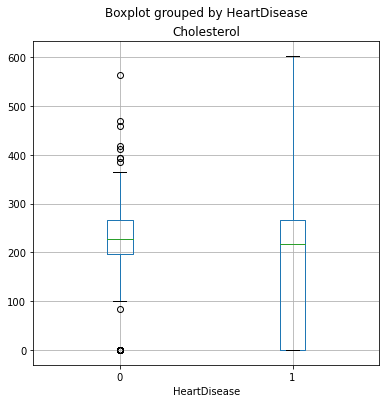

In [31]:
# use boxplots on selected numerical variables to gain an understanding on the distributions by label type
num_feat = ['Age','RestingBP','Cholesterol']

for nn in num_feat:
    heart.boxplot(column=nn, by='HeartDisease', figsize=(6,6))
    plt.title(nn)
plt.show()

In [32]:
# split the data into training and testing sets (70 / 30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 642
Test cases: 276


Undertake the data transformation using pipelines

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# normalize the numeric columns
#must be done with column index, not name (using numpy)
num_feat = [0,3,4,5,7,9]
num_trans = Pipeline(steps=[('scaler', StandardScaler())])

# one hot encode the categorical columns
cat_feats = [1,2,6,8,10]
cat_trans = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# combine the two steps
transform = ColumnTransformer(transformers=[
    ('num', num_trans, num_feat),
    ('cat', cat_trans, cat_feats)])


Train a classifier using the random forest algorithm

In [37]:
from sklearn.ensemble import RandomForestClassifier
# create a pipeline that transforms and models the data
pipeline = Pipeline(steps=[('preprocessor', transform),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

model = pipeline.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 3, 4, 5, 7, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 2, 6, 8, 10])])),
                ('logregressor', RandomForestClassifier())])


Check the metrics

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

predict = model.predict(X_test)
y_score = model.predict_proba(X_test)

con_mat = confusion_matrix(y_test, predict)
acc_score = round(accuracy_score(y_test, predict), 2)
prec_score = round(precision_score(y_test, predict),2)
reca_score = round(recall_score(y_test, predict), 2)
auc = round(roc_auc_score(y_test, y_score[:,1]),2)

print(f'Confusion Matrix: \n{con_mat}\n\nAccuracy Score: {acc_score}\n\nPrecision Score: {prec_score}\n\nRecall Score: {reca_score}\n\nAUC: {auc}')

Confusion Matrix: 
[[ 89  24]
 [ 18 145]]

Accuracy Score: 0.85

Precision Score: 0.86

Recall Score: 0.89

AUC: 0.92


calculate and plot the ROC curve

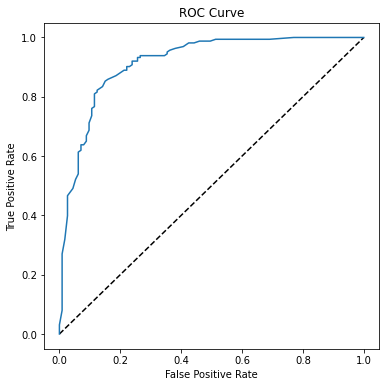

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

fig = plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

use the model to make predictions based on unseen data

In [52]:
new_data = ([[48, 'F', 'ASY', 138, 214, 0, 'Normal', 108, 'Y', 1.5, 'Flat']]) 
pred = model.predict(new_data)

print(f'The predicted class is {pred[0]}.')

The predicted class is 1.
